In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("untappd 240722.csv")

In [3]:
df.head()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Sam Adams Light®,Samuel Adams,Lager - American Light,4.3,10,NaN,Untappd at Home,NaN,Everywhere,United States,...,Bottle,1145894528,4049,157,https://untappd.s3.amazonaws.com/photo/2022_04...,3.02,3.03,NaN,0,0
1,Premium Lager,Fürstlich Fürstenbergische Brauerei,Lager - Dortmunder / Export,5.3,21,NaN,NaN,NaN,NaN,NaN,...,Bottle,1015398174,56457,564,https://untappd.s3.amazonaws.com/photo/2021_04...,3.25,3.27,NaN,0,0
2,Tecate,Cervecería Cuauhtémoc Moctezuma S.A. de C.V.,Lager - Mexican,4.5,14,NaN,Chankanaab Park,Cozumel,Quintana Roo,México,...,Can,1015399655,5880,360,https://untappd.s3.amazonaws.com/photo/2021_04...,2.83,2.83,NaN,0,0
3,Dos Equis Lager Especial,Cervecería Cuauhtémoc Moctezuma S.A. de C.V.,Lager - Mexican,4.2,10,NaN,Untappd at Home,NaN,Everywhere,United States,...,Bottle,1015400448,10887,360,https://untappd.s3.amazonaws.com/photo/2021_04...,3.09,3.10,NaN,0,0
4,Polar Export,AmBev,Lager - American,4.9,10,NaN,Untappd at Home,NaN,Everywhere,United States,...,Can,1015401302,94466,4538,https://untappd.s3.amazonaws.com/photo/2021_04...,2.67,2.73,NaN,0,0


In [4]:
df.shape

(976, 32)

In [5]:
df.describe()

,beer_abv,beer_ibu,venue_lat,venue_lng,rating_score,checkin_id,bid,brewery_id,global_rating_score,global_weighted_rating_score,total_toasts,total_comments
count,976.000000,976.000000,760.000000,760.000000,949.000000,9.760000e+02,9.760000e+02,976.000000,976.000000,976.000000,976.000000,976.000000
mean,6.120686,28.802254,13.086699,-65.703642,3.504531,9.977224e+08,2.088067e+06,143349.698770,3.582879,3.611107,0.340164,0.007172
std,1.903256,39.426021,27.287267,16.448257,0.357139,1.272133e+08,1.656261e+06,157066.810658,0.628615,0.339310,0.561194,0.095809
min,0.000000,0.000000,-34.608900,-86.993800,1.300000,5.012450e+08,2.210000e+02,5.000000,0.000000,0.840000,0.000000,0.000000
25%,5.000000,8.750000,-22.829000,-77.948200,3.400000,8.684899e+08,2.001590e+05,4729.250000,3.457500,3.520000,0.000000,0.000000
50%,5.700000,24.000000,34.234700,-77.948200,3.500000,1.015654e+09,2.045637e+06,73496.000000,3.680000,3.680000,0.000000,0.000000
75%,7.000000,40.000000,34.234700,-47.081950,3.750000,1.118882e+09,3.576945e+06,278580.000000,3.900000,3.800000,1.000000,0.000000
max,13.500000,1000.000000,53.800800,0.451897,4.250000,1.183872e+09,4.891687e+06,518073.000000,4.480000,4.330000,3.000000,2.000000


In [6]:
df.groupby('beer_abv')['beer_ibu'].mean()

beer_abv
0.00      7.00
0.05      0.00
0.40     23.50
0.50     10.00
2.50      7.00
         ...  
11.50    73.00
11.80    32.00
12.00    38.75
12.50     0.00
13.50    50.00
Name: beer_ibu, Length: 85, dtype: float64

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='beer_abv', ylabel='beer_ibu'>

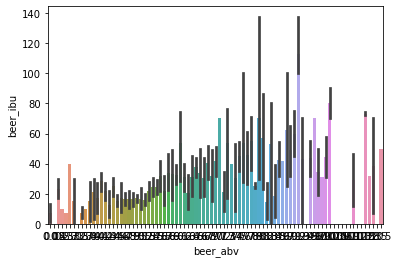

In [8]:
sns.barplot(x='beer_abv', y='beer_ibu', data=df)

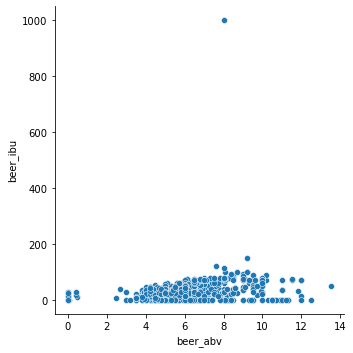

In [9]:
sns.relplot(x='beer_abv', y='beer_ibu', data=df)

In [11]:
df.groupby('beer_type')['rating_score'].mean().sort_values(ascending=False)

beer_type
Lambic - Gueuze                     4.000
Stout - Imperial / Double Coffee    4.000
Bock - Eisbock                      4.000
Strong Ale - Other                  4.000
Porter - Baltic                     3.900
                                    ...  
Lager - American                    2.732
Shandy / Radler                     2.500
Scottish Ale                        2.250
Non-Alcoholic Beer - Wheat Beer     2.250
Lager - Dortmunder / Export           NaN
Name: rating_score, Length: 142, dtype: float64

In [12]:
df.groupby('beer_type')['beer_abv'].mean()['rating_score'].mean().sort_values(ascending=False)

KeyError: 'rating_score'

In [45]:
df.groupby('beer_type').agg(
    beer_abv_mean = ('beer_abv', 'mean'),
    beer_ibu_mean = ('beer_ibu', 'mean'),
    beer_score_mean = ('rating_score', 'mean')
)[df['beer_type'].value_counts() > 5].sort_values(by='beer_score_mean', ascending=False)

/var/folders/ts/5p4j6x6d76j6h786vkphjv940000gn/T/ipykernel_91647/3426683556.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('beer_type').agg(


,beer_abv_mean,beer_ibu_mean,beer_score_mean
beer_type,,,
Stout - Imperial / Double Pastry,10.900000,0.000000,3.875000
IPA - Black / Cascadian Dark Ale,7.425000,57.125000,3.837500
Belgian Quadrupel,10.450000,28.000000,3.816667
Stout - Imperial / Double,10.171429,42.285714,3.814286
IPA - Imperial / Double New England / Hazy,8.092308,18.461538,3.788462
Stout - Russian Imperial,10.364706,45.176471,3.785294
Belgian Tripel,8.138462,22.692308,3.750000
IPA - New England / Hazy,6.342264,23.811321,3.727451
Belgian Strong Golden Ale,8.466667,28.066667,3.726667
